In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('Dhaka Rent.csv', sep=';')

In [5]:
df.head() #default 5 rows

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [6]:
df.shape  #number of row and column

(60, 2)

In [7]:
df.corr()  #area and rent correlation

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


Text(0.5, 1.0, 'Area and Rent ratio of Dhaka rent')

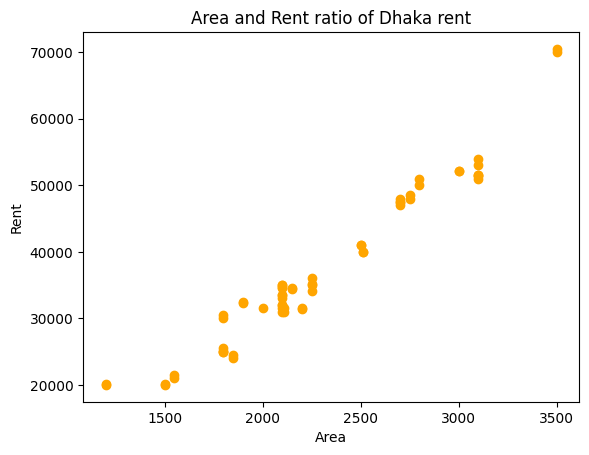

In [14]:
plt.scatter(df['area'] , df['rent'], color='orange', marker='o')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Area and Rent ratio of Dhaka rent')

In [16]:
df.describe()  #descriptive statistical value

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


# Raw code

1. Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2) <br>
2. Intercept, c = ȳ - m * x̄

In [25]:
x = df['area'] #2D - always 
y = df['rent']

In [26]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [27]:
mean_x

2289.0

In [28]:
mean_y

37269.166666666664

In [29]:
dev_x = x - mean_x
dev_y = y - mean_y

In [30]:
coefficient_m = np.sum(dev_x * dev_y) / np.sum(dev_x **2)
coefficient_m

21.292661473611954

In [31]:
intercept = mean_y - (coefficient_m * mean_x)
intercept

-11469.7354464311

In [32]:
independent_x = 6
(coefficient_m * independent_x) + intercept

-11341.979477589428

In [33]:
df.head(2)

,area,rent
0,2000,31500
1,2100,35000


# Sklearn

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
reg = LinearRegression()

In [37]:
reg.fit(df[['area']], df[['rent']]) # fit(x,y)

LinearRegression()

In [38]:
reg.coef_

array([[21.29266147]])

In [39]:
coefficient_m

21.292661473611954

In [40]:
reg.intercept_

array([-11469.73544643])

In [41]:
intercept

-11469.7354464311

In [43]:
reg.predict([[2000]])

c:\Users\mahen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[31115.58750079]])

In [55]:
(coefficient_m*2000) + intercept

31115.58750079281

In [61]:
pred = reg.predict([[2000]])
pred

c:\Users\mahen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[31115.58750079]])

In [70]:
df['pred'] = reg.predict(df[['area']])
df

,area,rent,pred
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974
5,1900,32500,28986.321353
6,1500,20000,20469.256764
7,1850,24500,27921.688280
8,2700,48000,46020.450532
9,2100,31000,33244.853648


Text(0.5, 1.0, 'area and rent ratio of dhaka rent')

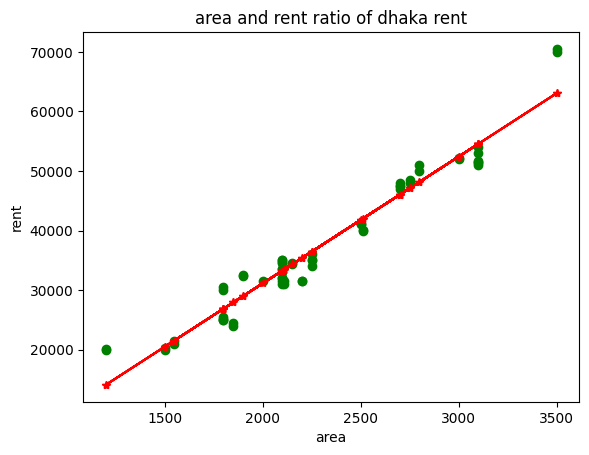

In [60]:
plt.plot(df[['area']], reg.predict(df[['area']]), marker='*', color='red') #best fit line
plt.scatter(df['area'] , df['rent'], color='green', marker='o')
plt.xlabel('area')
plt.ylabel('rent')
plt.title('area and rent ratio of dhaka rent')

Text(0.5, 1.0, 'area and rent')

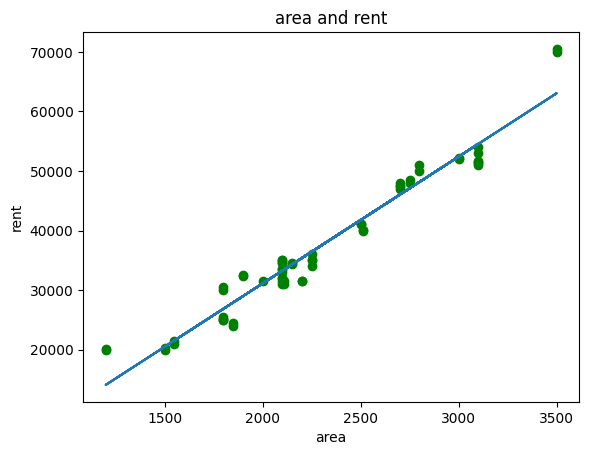

In [64]:
plt.plot(df[['area']], df['pred']) #best fit line
plt.scatter(df['area'] , df['rent'], color='green', marker='o')
plt.xlabel('area')
plt.ylabel('rent')
plt.title('area and rent')

# MSE

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [66]:
mse = mean_squared_error(df['area'], df['pred']) # actural y, predicted y
mse

1341200257.7959046

In [67]:
mae = mean_absolute_error(df['area'], df['pred']) # actural y, predicted y
mae

34980.16666666666